In [ ]:

import pandas as pd
from google.colab import files

# def read_multiple_csv_files():
#   uploaded = files.upload()
#   data_frames = []
#   for filename in uploaded.keys():
#     data_frames.append(pd.read_csv(filename))
#   return data_frames

uploaded = files.upload()
df = pd.read_csv('gmail-fadzwan - 1.csv' )


# data_frames = read_multiple_csv_files()

# Now you can access each DataFrame using the data_frames list.
# For example:
# df1 = data_frames[0]
# df2 = data_frames[1]

# And so on...


Saving gmail-fadzwan - 1.csv to gmail-fadzwan - 1.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.neural_network import MLPClassifier

nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('gmail-fadzwan - 1.csv')

def feature_engineering_spam_dataset(df):
    df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
    label_encoding(df)
    df = df.drop_duplicates(keep='first')
    df['message'] = df['message'].astype(str)  # Ensure all messages are strings

    # Storing the number of characters in each text string
    df['num_characters'] = df['message'].apply(len)

    # Stores the number of words using NLTK word tokenizer
    df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

    # Stores the number of sentences obtained by splitting text using NLTK sentence tokenizer
    df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

    return df

def label_encoding(df):
    le = LabelEncoder()
    df['label'] = le.fit_transform(df['label'])

def percentage_ham_spam(df):
    labels = ['ham', 'spam']
    percentages = [df[df['label'] == 0].shape[0] / df.shape[0] * 100,
                  df[df['label'] == 1].shape[0] / df.shape[0] * 100]
    plt.figure(figsize=(8, 6))
    plt.pie(percentages, labels=labels, autopct='%1.1f%%')
    plt.title('Percentage of Ham and Spam')
    plt.show()

def correlation_heatmap(df):
    correlation_matrix = df[['label', 'num_characters', 'num_words', 'num_sentences']].corr()

    # Heatmap correlation
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

    plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)

def find30spam(df):
    spam_corpus = []
    for msg in df[df['label'] == 1]['transformed_text'].tolist():
        for word in msg.split():
            spam_corpus.append(word)
    filter_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
    sns.barplot(data=filter_df, x=filter_df[0], y=filter_df[1], hue=filter_df[0])
    plt.xticks(rotation=90)
    plt.show()

def find30ham(df):
    ham_corpus = []
    for sentence in df[df['label'] == 0]['transformed_text'].tolist():
        for word in sentence.split():
            ham_corpus.append(word)
    filter_ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
    sns.barplot(data=filter_ham_df, x=filter_ham_df[0], y=filter_ham_df[1], palette='cool')
    plt.xticks(rotation=90)
    plt.show()

def BuildModel(df):
    tfidf = TfidfVectorizer(max_features=3000)
    X = tfidf.fit_transform(df['transformed_text']).toarray()
    y = df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<ipython-input-36-6a6d54a522cb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].astype(str)  # Ensure all messages are strings
<ipython-input-36-6a6d54a522cb>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['message'].apply(len)
<ipython-input-36-6a6d54a522cb>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

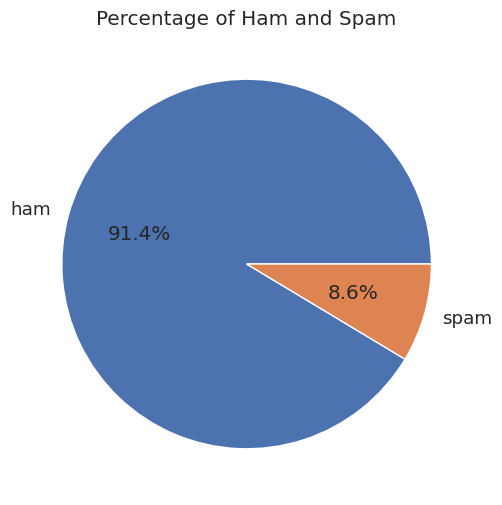

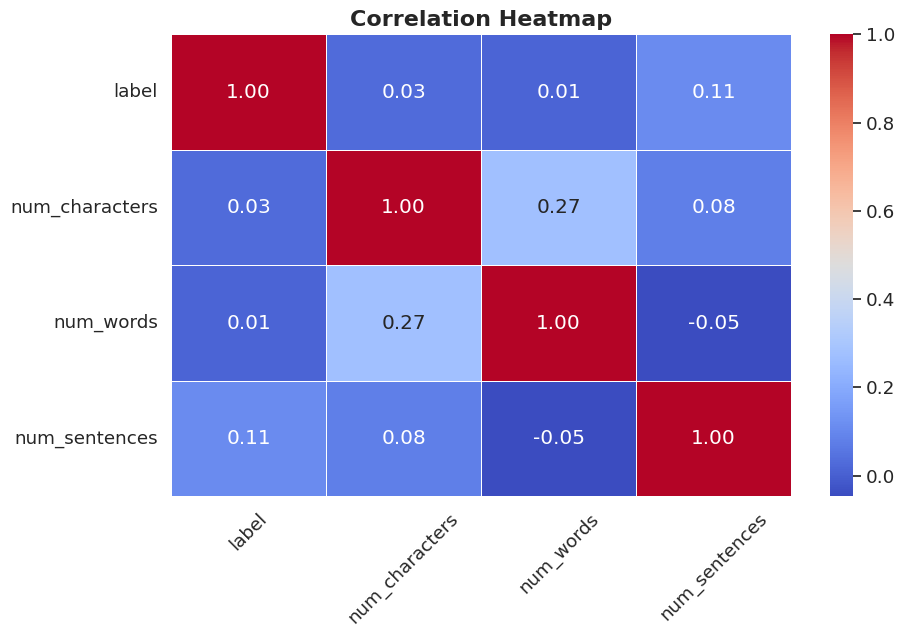

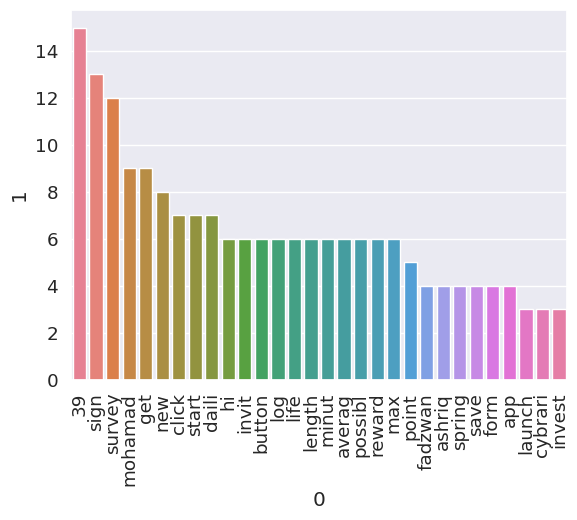

<ipython-input-36-6a6d54a522cb>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filter_ham_df, x=filter_ham_df[0], y=filter_ham_df[1], palette='cool')


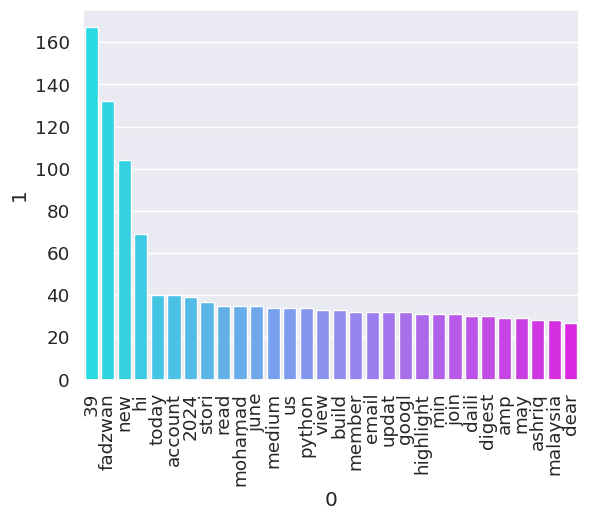

In [ ]:
# Process the dataset
df = feature_engineering_spam_dataset(df)
df['transformed_text'] = df['message'].apply(transform_text)



# Optionally, visualize the percentage of ham and spam
percentage_ham_spam(df)

# Optionally, visualize the correlation heatmap
correlation_heatmap(df)

# Optionally, visualize the 30 most common words in spam messages
find30spam(df)

# Optionally, visualize the 30 most common words in ham messages
find30ham(df)


In [ ]:
# Build and evaluate the model
accuracy, precision = BuildModel(df)
print(f'Accuracy: {accuracy}, Precision: {precision}')

Accuracy: 0.9166666666666666, Precision: 1.0
